In [15]:
# Google colab compatibility
try:
    import google.colab
    !pip install 'colour-science[plotting]'
except:
    pass

import colour
from colour.plotting import *

# needed to plot planckian locus on CIE1976UCS
from colour.models import (UCS_uv_to_xy, XYZ_to_UCS, UCS_to_uv, xy_to_XYZ, XYZ_to_Luv)
from colour.temperature import CCT_to_uv, CCT_to_uv_Ohno2013
from colour import SDS_ILLUMINANTS
import pylab

colour_style()

import matplotlib.pyplot as plt
import numpy as np

# default to uniform 1:1 figures
plt.style.use({'figure.figsize': (10.25, 10.25)})

# standardize bounding boxes
cie1931_boundingbox = (-0.1, 0.8375, -0.04, 0.885 )
cie1976ucs_boundingbox = (-0.1, 0.7, -0.1, 0.7)

# create output directory
import os
renderpath = r'render' 
if not os.path.exists(renderpath):
    os.makedirs(renderpath)

In [16]:
def xy_to_CIE_LUV(point):
    '''
    transform from CIE 1931 x,y to CIE 1976 u',v'
    '''
    x = point[0]
    y = point[1]
    u_prime = 4 * x / (-2 * x + 12 * y + 3)
    v_prime = 9 * y / (-2 * x + 12 * y + 3)
    return (u_prime, v_prime)

In [17]:
def plot_cct_locus(**kwargs):
    settings = {
        'chromaticity': '1976 UCS',
    }
    settings.update(kwargs)
    
    start, end = 1667, 100000
    if settings['chromaticity'] == '1976 UCS':
        xy = np.array(
            [xy_to_CIE_LUV(UCS_uv_to_xy(CCT_to_uv(np.array([x, 0]))))
             for x in np.arange(start, end + 250, 250)])  # yapf: disable
    else:
        xy = np.array(
            [UCS_uv_to_xy(CCT_to_uv(np.array([x, 0])))
             for x in np.arange(start, end + 250, 250)])  # yapf: disable
    
    pylab.plot(xy[..., 0], xy[..., 1], color='black', linewidth=1)
    
    for i in (1667, 2000, 2500, 3000, 4000, 6000, 10000):
        x0, y0 = UCS_uv_to_xy(CCT_to_uv(np.array([i, -0.025])))
        x1, y1 = UCS_uv_to_xy(CCT_to_uv(np.array([i, 0.025])))
        if settings['chromaticity'] == '1976 UCS':
            (x0,y0) = xy_to_CIE_LUV([x0,y0])
            (x1,y1) = xy_to_CIE_LUV([x1,y1])
            
        pylab.plot((x0, x1), (y0, y1), color='black', linewidth=0.5)
        
        pylab.annotate(
            '{0}K'.format(i),
            xy=(x0, y0),
            xytext=(0, -8),
            color='black',
            textcoords='offset points',
            size='x-small')

(<Figure size 1025x1025 with 1 Axes>,
 <AxesSubplot:title={'center':'D65 Illuminants - Planckian Locus\nCIE 1976 UCS Chromaticity Diagram - CIE 1931 2° Standard Observer'}, xlabel="CIE u'", ylabel="CIE v'">)

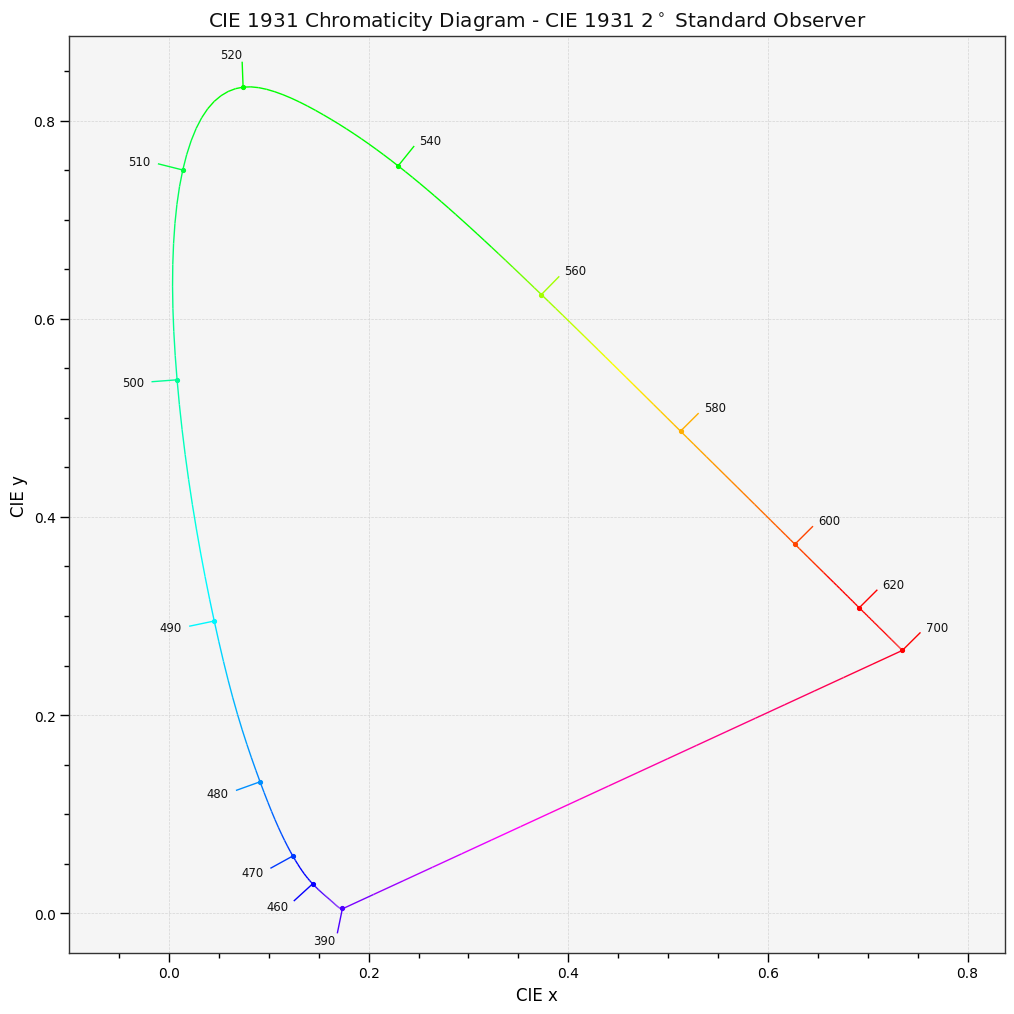

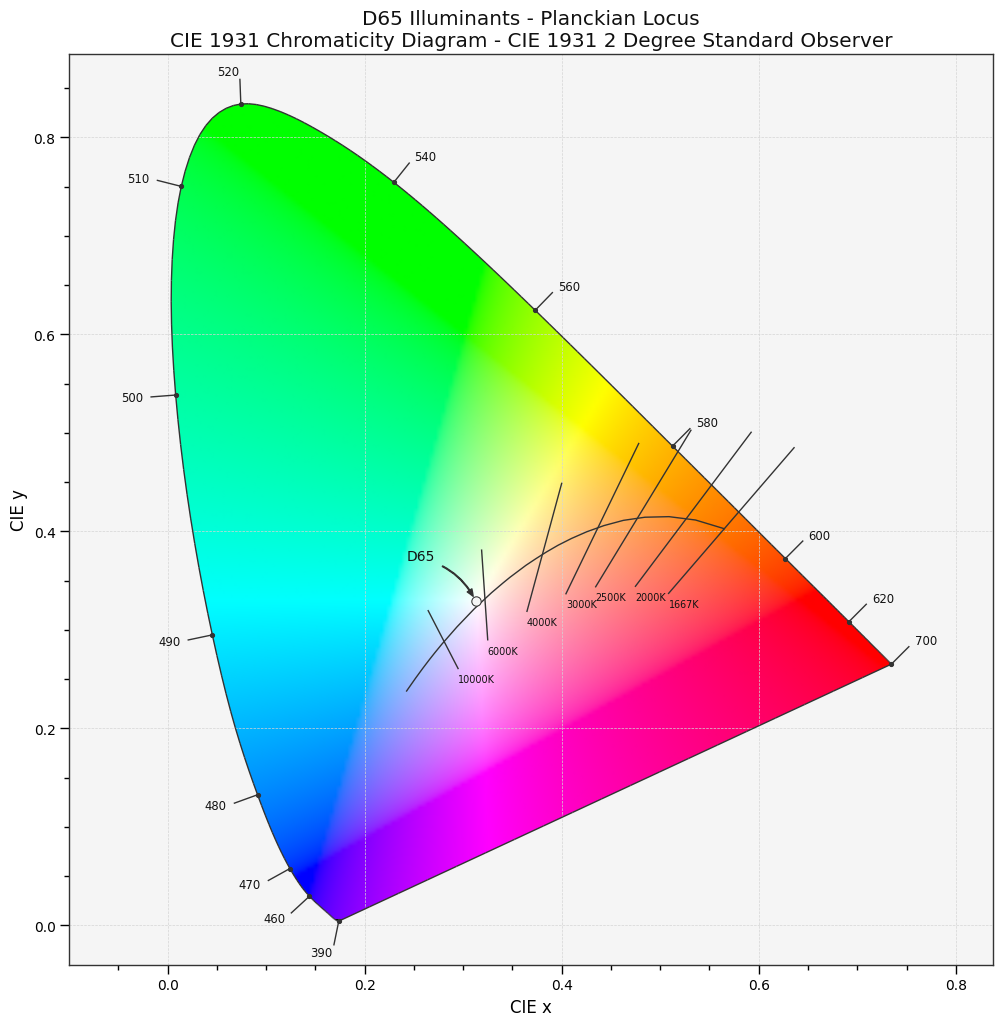

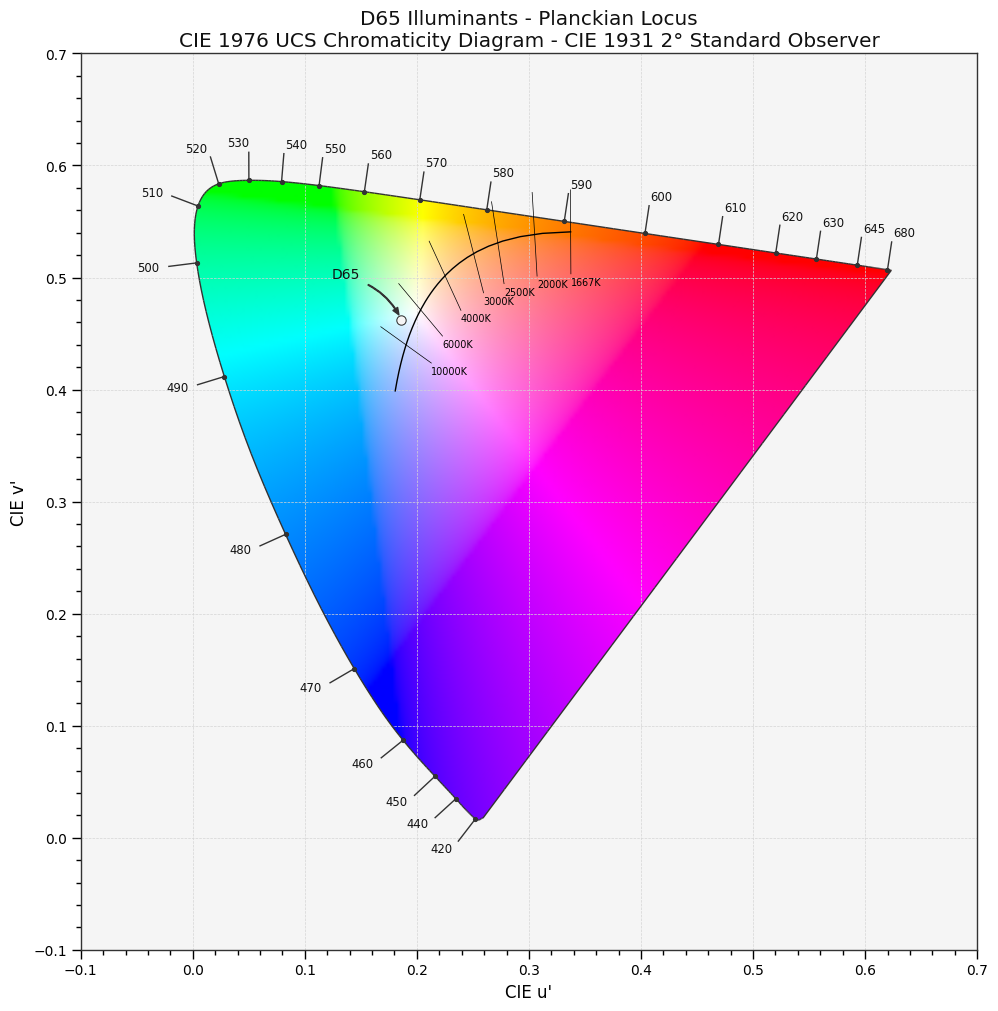

In [18]:
plot_chromaticity_diagram_CIE1931(
    spectral_locus_colours='RGB',
    show_diagram_colours=False,
    bounding_box=cie1931_boundingbox,
    filename='render/spectral_locus_cie1931.png')

# Planckian locus
plot_planckian_locus_in_chromaticity_diagram_CIE1931(
    ['d65'],
    bounding_box=cie1931_boundingbox,
    filename='render/planckian_locus_cie1931.png')

# why doesn't this exist in the colour package?
#plot_planckian_locus_in_chromaticity_diagram_CIE1976UCS(['d65'])

# recreate CIE 1976 UCS manually for completeness
plot_sds_in_chromaticity_diagram_CIE1976UCS(
    [SDS_ILLUMINANTS['D65']],
    bounding_box=cie1976ucs_boundingbox,
    standalone=False,
    title='D65 Illuminants - Planckian Locus\nCIE 1976 UCS Chromaticity Diagram - CIE 1931 2° Standard Observer')
# plot cct locus
plot_cct_locus(chromaticity='1976 UCS', standalone=False)
render(
    filename='render/planckian_locus_cie1976ucs.png',
    standalone=True)


(<Figure size 1025x1025 with 1 Axes>,
 <AxesSubplot:title={'center':'CIE 1976 UCS Chromaticity Diagram - CIE 1931 2$^\\circ$ Standard Observer'}, xlabel="CIE u'", ylabel="CIE v'">)

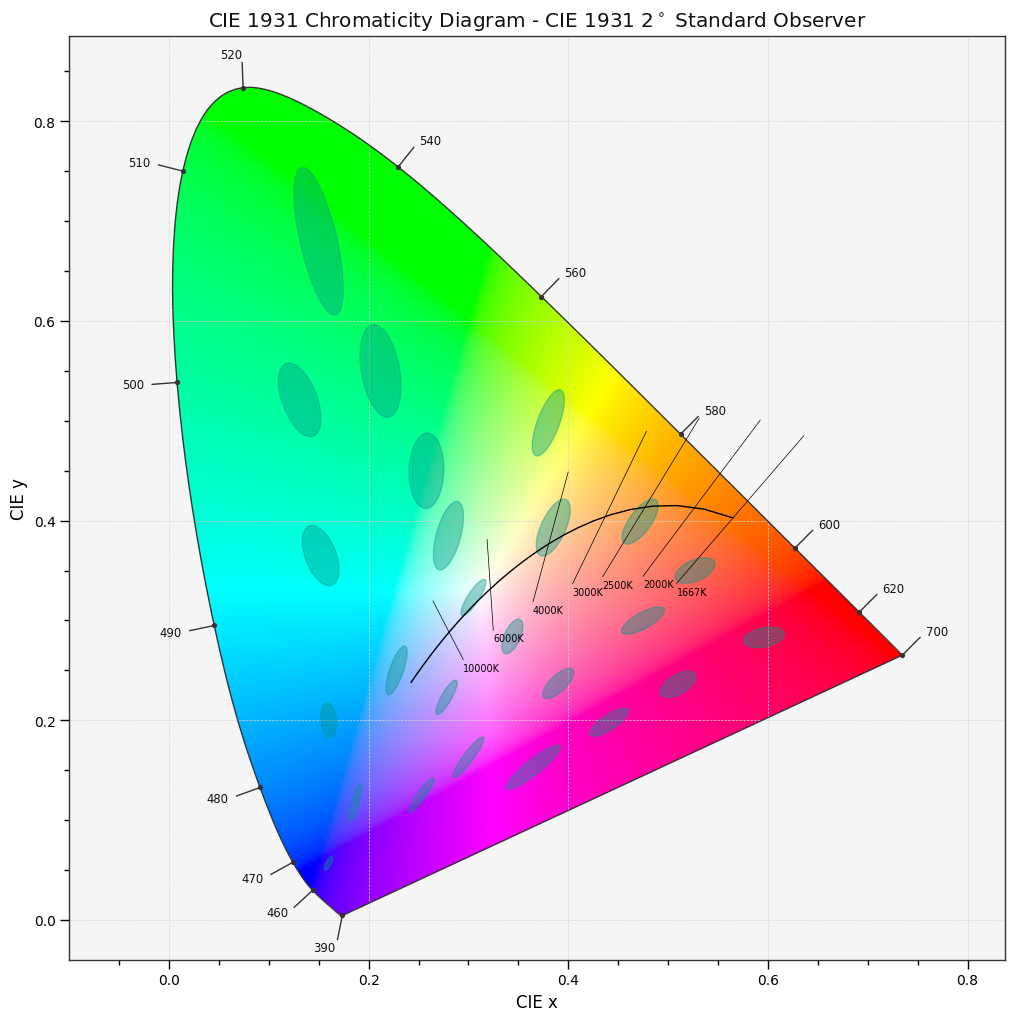

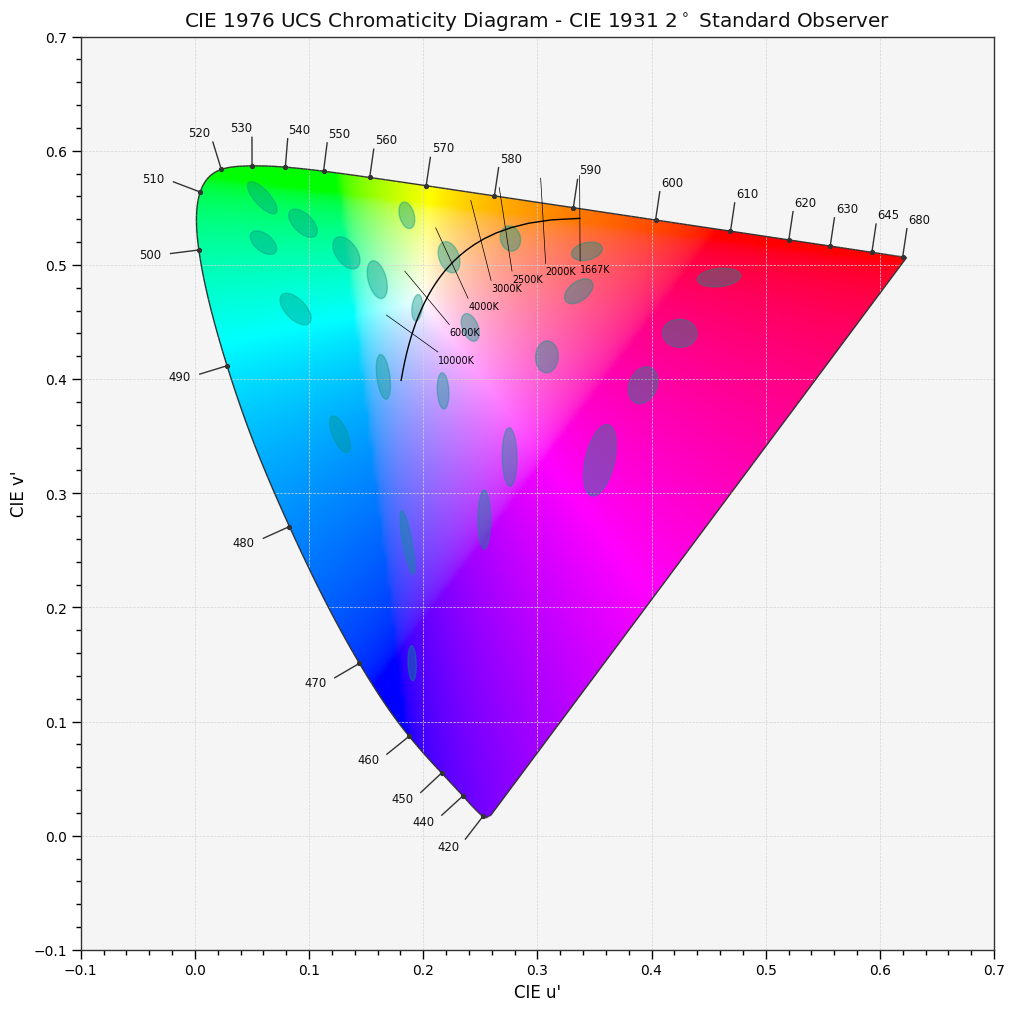

In [19]:
figure, axes = plot_ellipses_MacAdam1942_in_chromaticity_diagram_CIE1931(
    standalone=False,
    bounding_box=cie1931_boundingbox)
plot_cct_locus(
    chromaticity='1931',
    
    figure=figure,
    axes=axes,
    standalone=False)
render(
    filename='render/macadam_cie1931.png',
    standalone=True)

figure, axes = plot_ellipses_MacAdam1942_in_chromaticity_diagram_CIE1976UCS(
    standalone=False,
    bounding_box=cie1976ucs_boundingbox)
plot_cct_locus(
    chromaticity='1976 UCS',
    
    figure=figure,
    axes=axes,
    standalone=False)
render(
    filename='render/macadam_cie1976ucs.png',
    standalone=True)

(<Figure size 1025x1025 with 1 Axes>,
 <AxesSubplot:title={'center':"CIE 1976 UCS Chromaticity Diagram - Pointer's Gamut"}, xlabel="CIE u'", ylabel="CIE v'">)

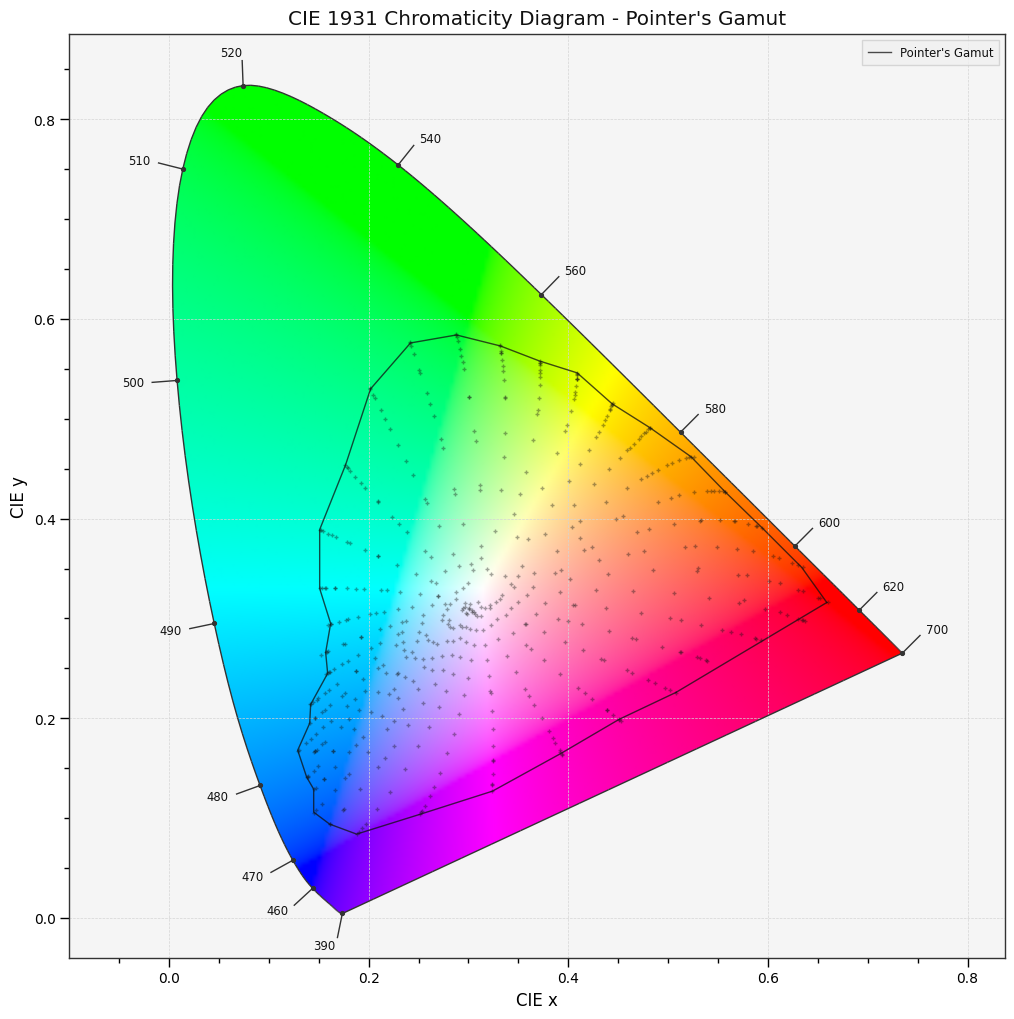

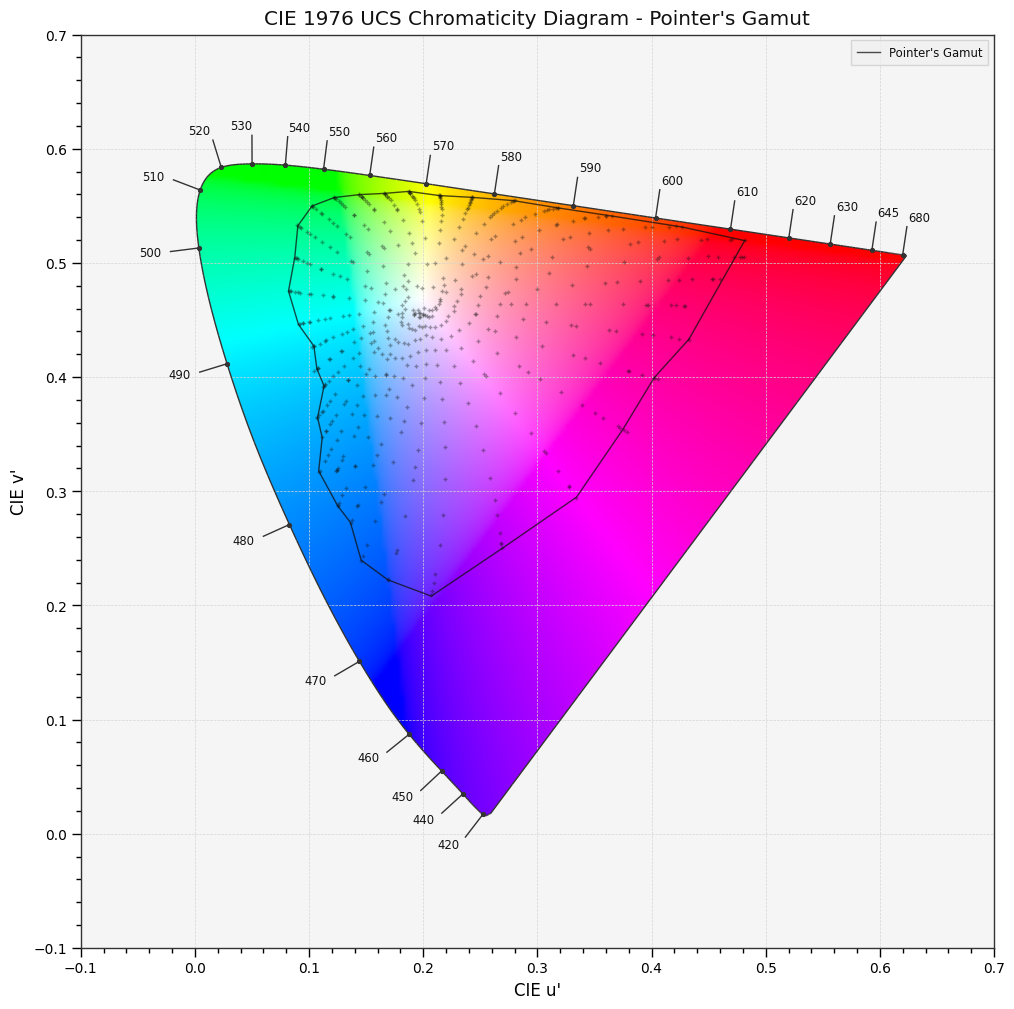

In [20]:
# illustrate Pointer's gamut

figure, axes = plot_chromaticity_diagram_CIE1931(
    bounding_box=cie1931_boundingbox,
    standalone=False)
plot_pointer_gamut(
    method='CIE 1931',
    
    figure=figure,
    axes=axes,
    standalone=False)
render(
    title="CIE 1931 Chromaticity Diagram - Pointer's Gamut",
    legend=True,
    filename='render/pointers_cie1931.png',
    standalone=True)

figure, axes = plot_chromaticity_diagram_CIE1976UCS(
    standalone=False,
    bounding_box=cie1976ucs_boundingbox)
plot_pointer_gamut(
    method='CIE 1976 UCS',
    
    figure=figure,
    axes=axes,
    standalone=False)
render(
    title="CIE 1976 UCS Chromaticity Diagram - Pointer's Gamut",
    legend=True,
    filename='render/pointers_cie1976ucs.png',
    standalone=True)

(<Figure size 1025x1025 with 1 Axes>,
 <AxesSubplot:title={'center':'SMPTE 240M, ITU-R BT.709, ITU-R BT.2020, DCI-P3\nCIE 1931 2 Degree Standard Observer - CIE 1976 UCS Chromaticity Diagram'}, xlabel="CIE u'", ylabel="CIE v'">)

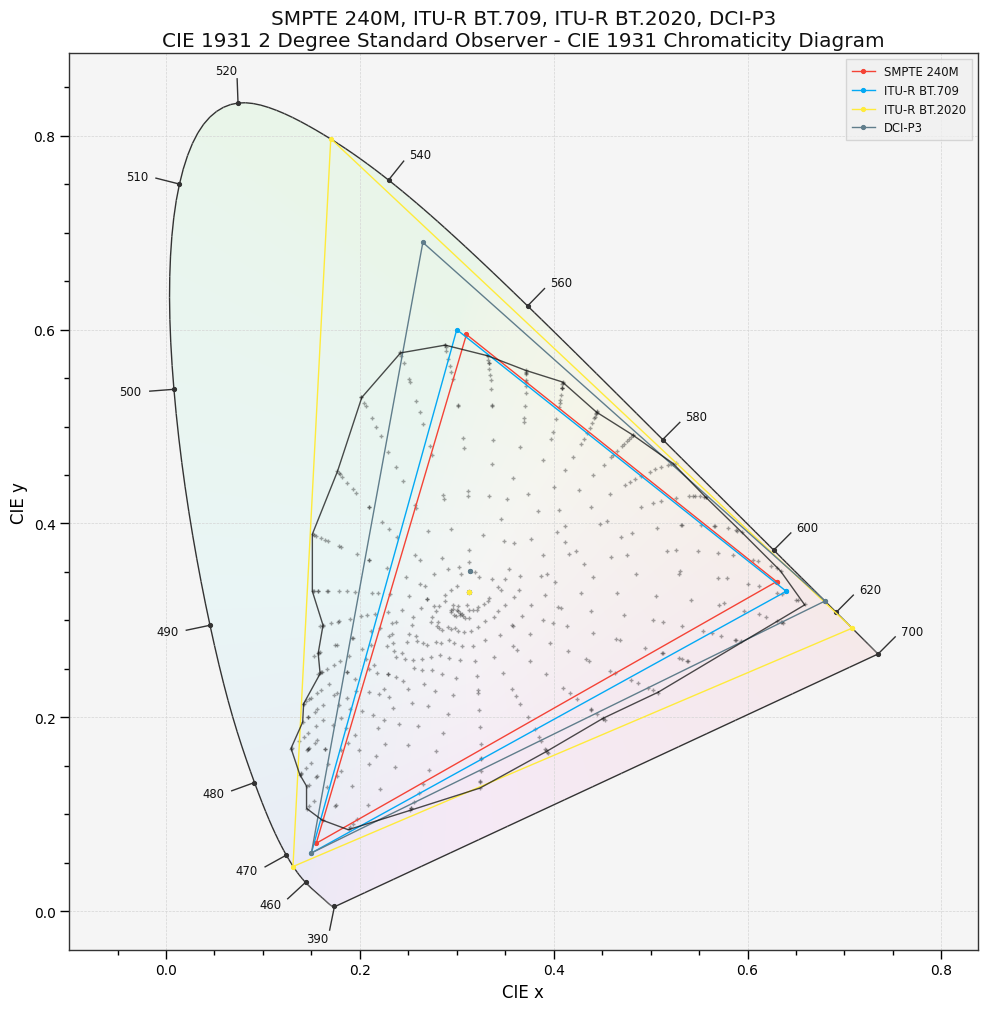

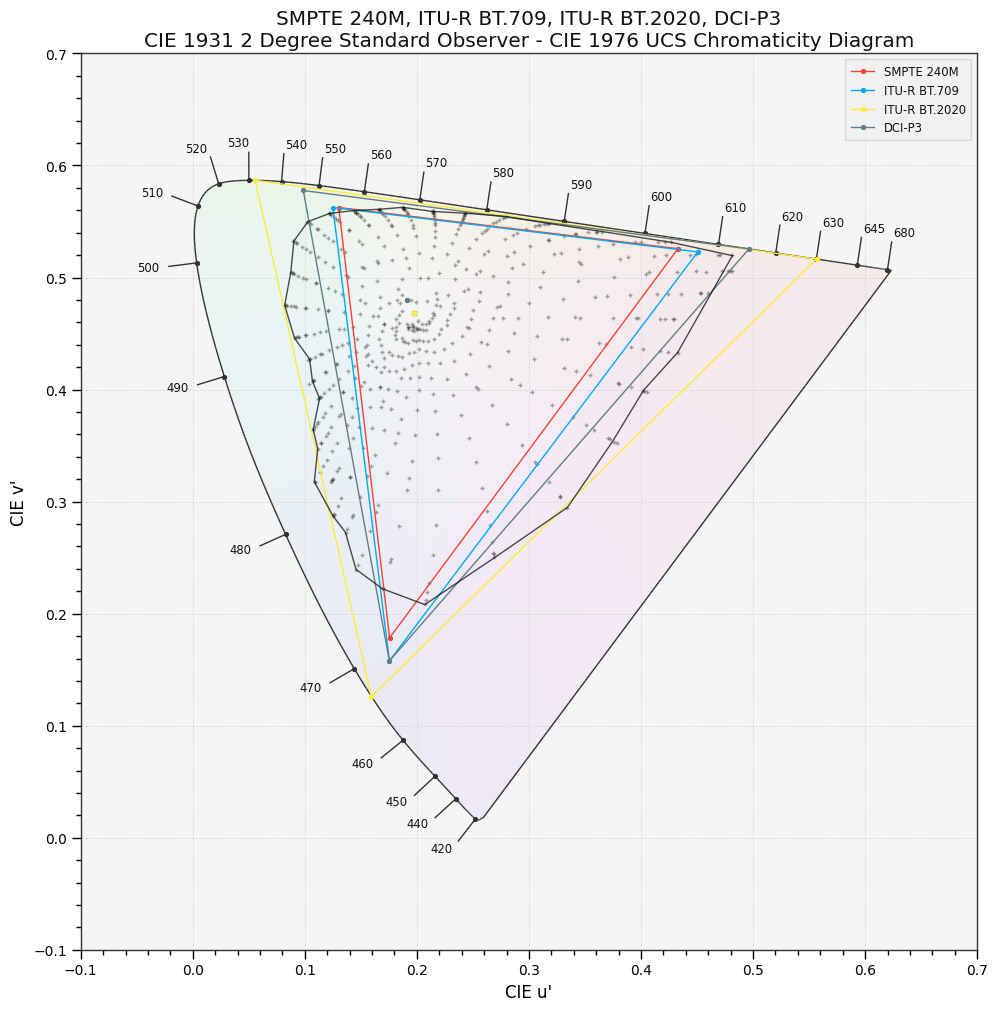

In [25]:
standardspaces = [
    'SMPTE 240M',
    'ITU-R BT.709',
    'ITU-R BT.2020',
    'DCI-P3'
]

# todo: figure out how to drop the opacity of the diagram colours to make it easier to see the gamut bounds
figure, axes = plot_RGB_colourspaces_in_chromaticity_diagram_CIE1931(
    standardspaces,
    bounding_box=cie1931_boundingbox,
    #show_diagram_colours=False,
    #spectral_locus_colours='RGB',
    diagram_opacity=0.05,
    standalone=False)
plot_pointer_gamut(
    method='CIE 1931',
    figure=figure,
    axes=axes,
    standalone=False)
render(
    filename='render/standardspaces_cie1931.png',
    standalone=True)

figure, axes = plot_RGB_colourspaces_in_chromaticity_diagram_CIE1976UCS(
    standardspaces,
    
    #show_diagram_colours=False,
    diagram_opacity=0.05,
    bounding_box=cie1976ucs_boundingbox,
    standalone=False)
plot_pointer_gamut(
    method='CIE 1976 UCS',
    figure=figure,
    axes=axes,
    standalone=False)
render(
    filename='render/standardspaces_cie1976ucs.png',
    standalone=True)

In [27]:
bo3_colourspace = colour.RGB_Colourspace(
    'ROE BO3', # label
    primaries=np.array(
        [[0.6897, 0.3096],
         [0.1557, 0.7379],
         [0.1287, 0.0701]]),
    whitepoint=np.array([0.3229, 0.3210]),
    use_derived_matrix_RGB_to_XYZ=True,
    use_derived_matrix_XYZ_to_RGB=True)  # yapf: disable
#bo3_colourspace.use_derived_transformation_matrices(True)
display(bo3_colourspace.matrix_RGB_to_XYZ)
display(bo3_colourspace.matrix_XYZ_to_RGB)

colour.RGB_COLOURSPACES['ROE BO3'] = bo3_colourspace

standardspaces = [
    'ROE BO3',
    'ITU-R BT.709',
    #'ITU-R BT.2020',
    #'DCI-P3'
]


array([[  7.17304462e-01,   1.24162291e-01,   1.64452249e-01],
       [  3.21991390e-01,   5.88435163e-01,   8.95734473e-02],
       [  7.28016708e-04,   8.48482197e-02,   1.02376956e+00]])

array([[ 1.52452189, -0.29002808, -0.21951448],
       [-0.84470933,  1.88183559, -0.02895979],
       [ 0.06892391, -0.15575698,  0.97933855]])

(<Figure size 1025x1025 with 1 Axes>,
 <AxesSubplot:title={'center':'ROE BO3, ITU-R BT.2020\nCIE 1931 2 Degree Standard Observer - CIE 1976 UCS Chromaticity Diagram'}, xlabel="CIE u'", ylabel="CIE v'">)

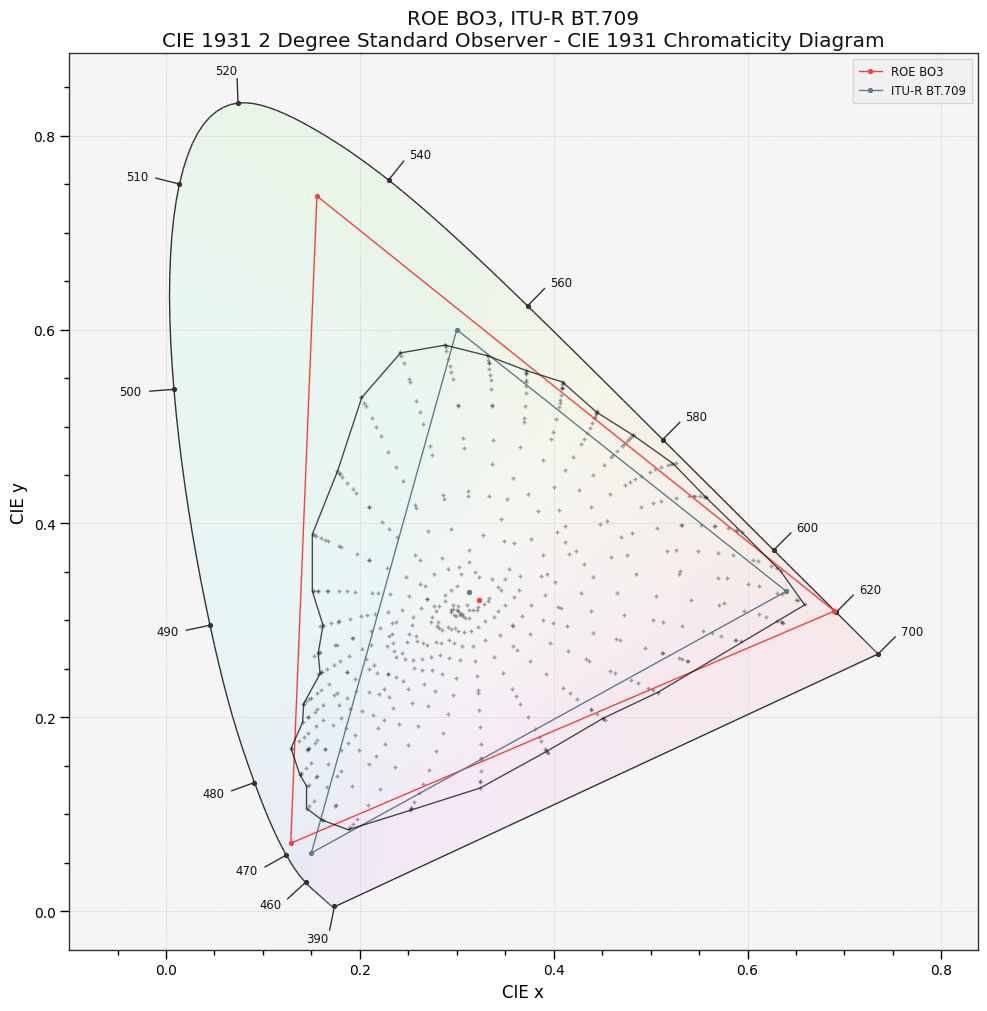

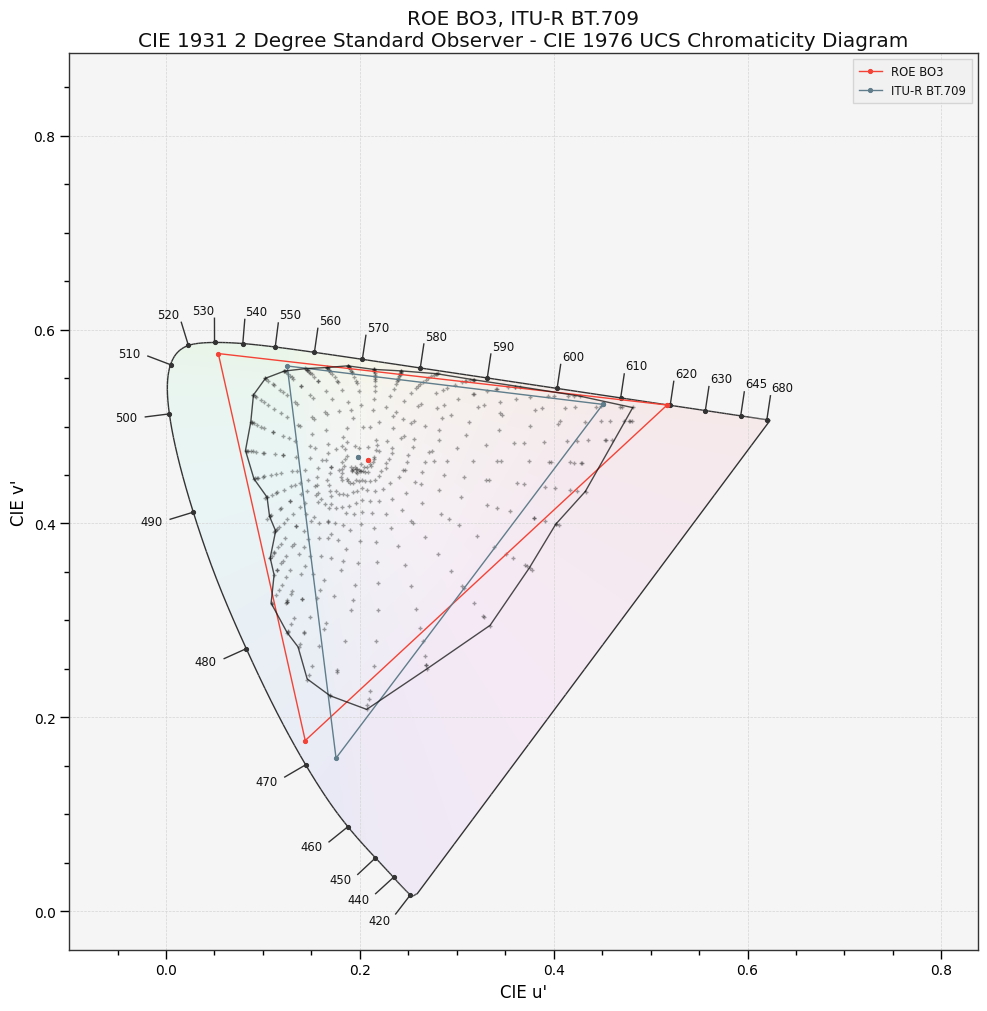

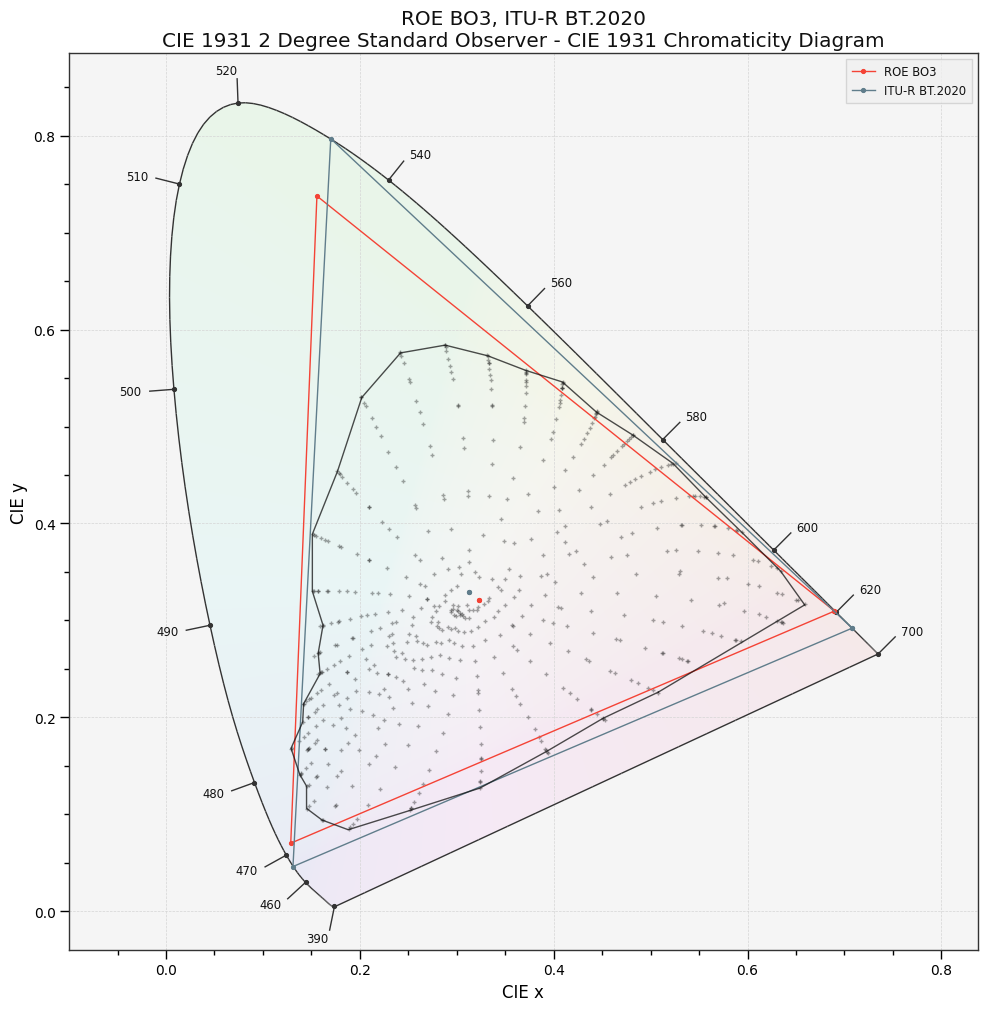

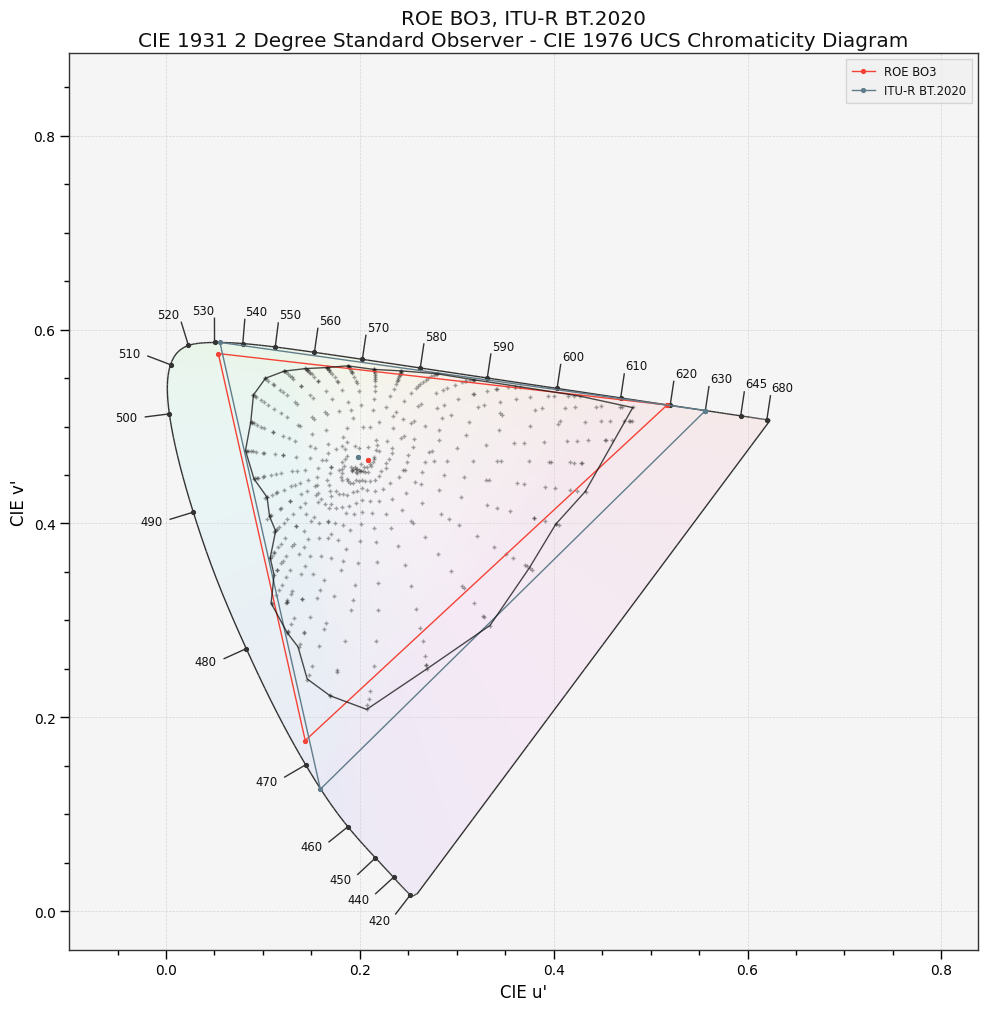

In [30]:
# todo: figure out how to drop the opacity of the diagram colours to make it easier to see the gamut bounds
figure, axes = plot_RGB_colourspaces_in_chromaticity_diagram_CIE1931(
    ['ROE BO3', 'ITU-R BT.709'],
    bounding_box=cie1931_boundingbox,
    diagram_opacity=0.05,
    standalone=False
)
plot_pointer_gamut(
    method='CIE 1931',
    figure=figure,
    axes=axes,
    standalone=False)
render(
    filename='render/BO3_cie1931.png',
    standalone=True)

figure, axes = plot_RGB_colourspaces_in_chromaticity_diagram_CIE1976UCS(
    ['ROE BO3', 'ITU-R BT.709'],
    bounding_box=cie1931_boundingbox,
    diagram_opacity=0.05,
    standalone=False
)
plot_pointer_gamut(
    method='CIE 1976 UCS',
    figure=figure,
    axes=axes,
    standalone=False)
render(
    filename='render/BO3_cie1976ucs.png',
    standalone=True)

figure, axes = plot_RGB_colourspaces_in_chromaticity_diagram_CIE1931(
    ['ROE BO3', 'ITU-R BT.2020'],
    bounding_box=cie1931_boundingbox,
    diagram_opacity=0.05,
    standalone=False
)
plot_pointer_gamut(
    method='CIE 1931',
    figure=figure,
    axes=axes,
    standalone=False)
render(
    filename='render/BO3_cie1931.png',
    standalone=True)

figure, axes = plot_RGB_colourspaces_in_chromaticity_diagram_CIE1976UCS(
    ['ROE BO3', 'ITU-R BT.2020'],
    bounding_box=cie1931_boundingbox,
    diagram_opacity=0.05,
    standalone=False
)
plot_pointer_gamut(
    method='CIE 1976 UCS',
    figure=figure,
    axes=axes,
    standalone=False)
render(
    filename='render/BO3_cie1976ucs.png',
    standalone=True)

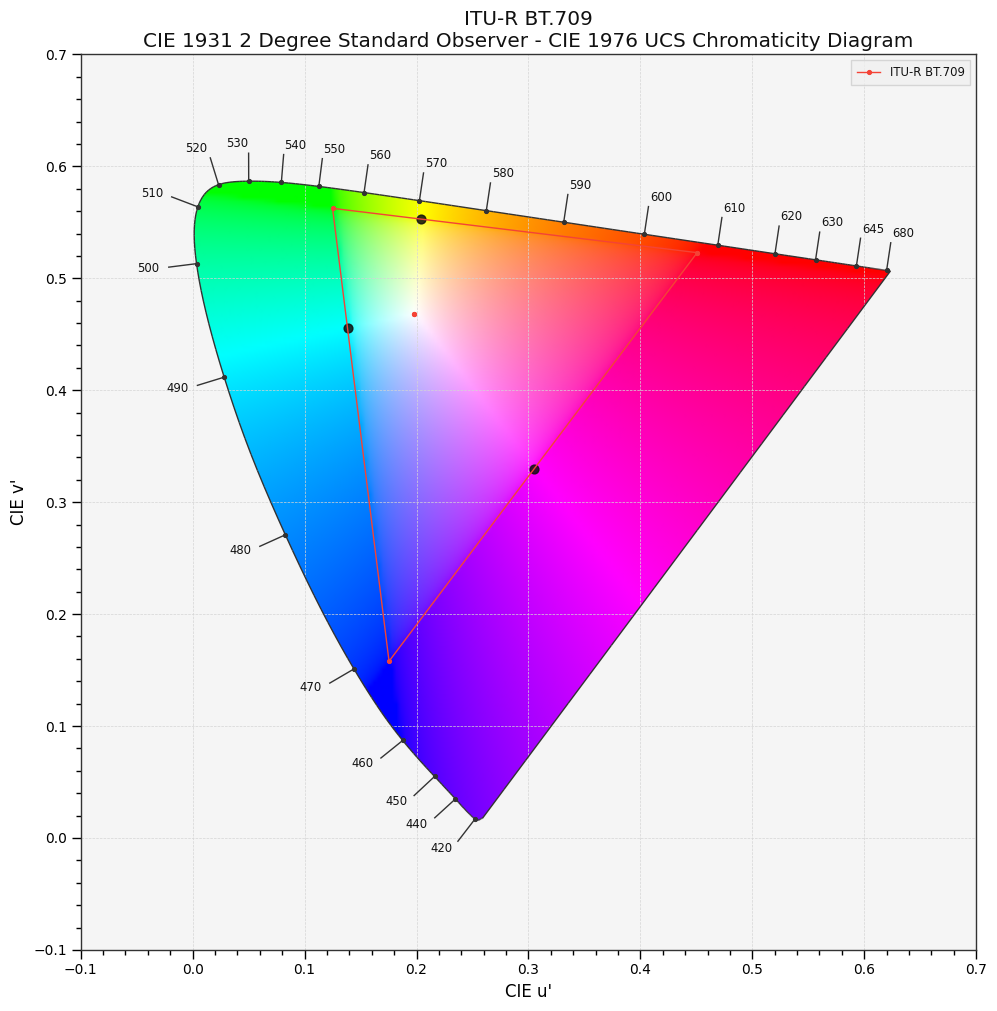

ValueError: einstein sum subscripts string contains too many subscripts for operand 0

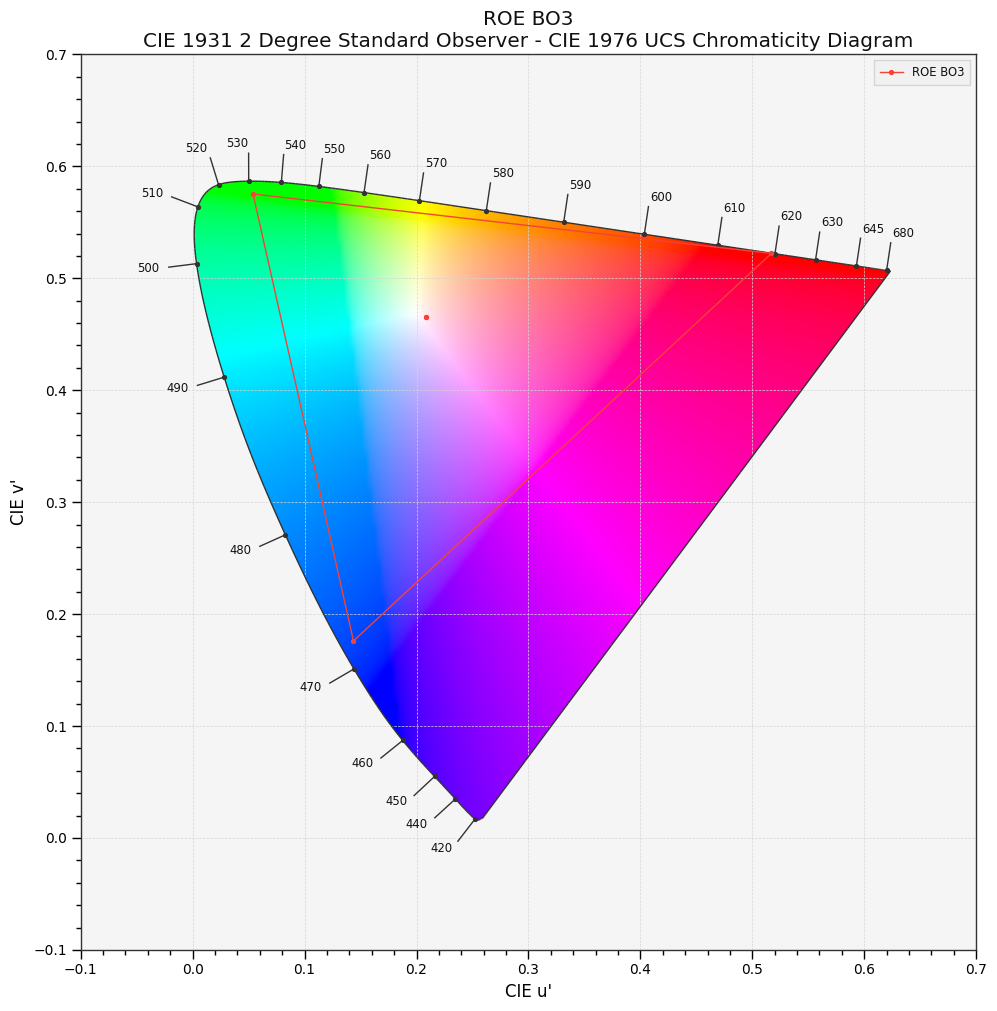

In [139]:
def plot_RGB_chromaticities_in_(**kwargs):
    settings = {
        'chromaticity': '1976 UCS',
    }
    settings.update(kwargs)
    
    start, end = 1667, 100000
    if settings['chromaticity'] == '1976 UCS':
        xy = np.array(
            [xy_to_CIE_LUV(UCS_uv_to_xy(CCT_to_uv(np.array([x, 0]))))
             for x in np.arange(start, end + 250, 250)])  # yapf: disable
    else:
        xy = np.array(
            [UCS_uv_to_xy(CCT_to_uv(np.array([x, 0])))
             for x in np.arange(start, end + 250, 250)])  # yapf: disable
    
    pylab.plot(xy[..., 0], xy[..., 1], color='black', linewidth=1)
    
    for i in (1667, 2000, 2500, 3000, 4000, 6000, 10000):
        x0, y0 = UCS_uv_to_xy(CCT_to_uv(np.array([i, -0.025])))
        x1, y1 = UCS_uv_to_xy(CCT_to_uv(np.array([i, 0.025])))
        if settings['chromaticity'] == '1976 UCS':
            (x0,y0) = xy_to_CIE_LUV([x0,y0])
            (x1,y1) = xy_to_CIE_LUV([x1,y1])
            
        pylab.plot((x0, x1), (y0, y1), color='black', linewidth=0.5)
        
        pylab.annotate(
            '{0}K'.format(i),
            xy=(x0, y0),
            xytext=(0, -8),
            color='black',
            textcoords='offset points',
            size='x-small')
        
RGB = np.random.random((128, 128, 3))
pure_secondaries = np.array([0, 1, 1, 1, 1, 0, 1, 0, 1])

def foo(**kwargs):
    return plot_chromaticity_diagram_CIE1976UCS()

plot_RGB_chromaticities_in_chromaticity_diagram_CIE1976UCS(
    pure_secondaries,
    'ITU-R BT.709',
    scatter_kwargs={"c" : '#111111'},
    #show_diagram_colours=False,
    #standalone=False
)

plot_RGB_chromaticities_in_chromaticity_diagram_CIE1976UCS(
    RGB,
        colour.RGB_Colourspace(
    'ROE BO3', # label
    primaries=np.array(
        [[0.6897, 0.3096],
         [0.1557, 0.7379],
         [0.1287, 0.0701]]),
    whitepoint=np.array([0.3229, 0.3210])),
    scatter_kwargs={"c" : '#111111'},
    #show_diagram_colours=False,
    #standalone=False,
)


#display(standalone=True)